In [194]:
#IMPORT lIBRARIES
import pandas as pd
!pip install rdkit
!pip install pubchempy
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [147]:
# Load the .xls file containing drug names and BCS classifications
df = pd.read_csv('./BCS_CLASS.csv')
df.head()

,Drug Name,BDDCS
0,Acarbose,1
1,Acetaminophen,1
2,Acetazolamide,4
3,Acetohexamide,1
4,Acrivastine,3


In [148]:
#gathering descriptors from pubchem

data = []

for i in df['Drug Name']:
    props = pcp.get_properties(['MolecularFormula', 'MolecularWeight',
                                'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge',
                                'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
                                'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount',
                                'DefinedAtomStereoCount', 'UndefinedAtomStereoCount', 'BondStereoCount',
                                'DefinedBondStereoCount', 'UndefinedBondStereoCount', 'CovalentUnitCount',
                                'Volume3D', 'XStericQuadrupole3D', 'YStericQuadrupole3D',
                                'ZStericQuadrupole3D', 'FeatureCount3D', 'FeatureAcceptorCount3D',
                                'FeatureDonorCount3D', 'FeatureAnionCount3D', 'FeatureCationCount3D',
                                'FeatureRingCount3D', 'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
                                'EffectiveRotorCount3D', 'ConformerCount3D'], i, 'name',)
    data.append(props)

In [154]:
#making descriptors dataframe

rows = []
columns = data[0][0].keys()
for i in range(494):
    rows.append(data[i][0].values())
props_df = pd.DataFrame(data=rows, columns=columns)
props_df.head()

,CID,MolecularFormula,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
0,41774,C25H43NO18,645.6,-8.5,645.24801352,645.24801352,321.0,962,0,14,...,37.0,18.0,14.0,0.0,1.0,4.0,0.0,1.2,13.4,10.0
1,1983,C8H9NO2,151.16,0.5,151.063328530,151.063328530,49.3,139,0,2,...,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.4,2.0,2.0
2,1986,C4H6N4O3S2,222.3,-0.3,221.98813241,221.98813241,152.0,297,0,2,...,7.0,4.0,2.0,0.0,0.0,1.0,0.0,0.6,3.0,10.0
3,1989,C15H20N2O4S,324.4,2.4,324.11437830,324.11437830,101.0,498,0,2,...,8.0,4.0,2.0,0.0,0.0,2.0,0.0,0.8,7.2,10.0
4,5284514,C22H24N2O2,348.4,1.6,348.183778013,348.183778013,53.4,514,0,1,...,8.0,3.0,0.0,1.0,1.0,3.0,0.0,0.8,7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,35370,C10H13N5O4,267.24,0,267.09675391,267.09675391,93.2,484,0,2,...,8.0,4.0,2.0,0.0,0.0,2.0,0.0,0.6,4.0,10.0
490,60490,C11H12N2O2S,236.29,1.6,236.06194880,236.06194880,94.8,275,0,2,...,4.0,1.0,1.0,0.0,0.0,2.0,0.0,0.6,3.0,10.0
491,60857,C16H21N3O2,287.36,2.2,287.16337692,287.16337692,57.4,375,0,2,...,8.0,1.0,2.0,0.0,2.0,3.0,0.0,0.8,5.8,10.0
492,5734,C8H8N2O3S,212.23,0.2,212.02556330,212.02556330,94.6,298,0,1,...,6.0,3.0,1.0,0.0,0.0,2.0,0.0,0.6,2.0,10.0


In [ ]:
#joining datasets and dropping unimportant columns

props_df['BDDCS'] = df['BDDCS']
props_df.drop(['CID','MolecularFormula'], axis=1,inplace=True)



In [219]:
#filling mssing values
props_df.fillna(props_df.mean(), inplace=True)

In [218]:
# Convert the molecular descriptors to a numpy array
descriptors = np.array(props_df.drop(["BDDCS"],axis=1))

# Convert the BCS classifications to a numpy array
bcs_classifications = np.array(props_df["BDDCS"])

In [231]:
# Prepare the data for machine learning
X_train, X_test, y_train, y_test = train_test_split(descriptors, bcs_classifications, test_size=0.2, random_state=42)

# Lenear regression model
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

#prediction
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

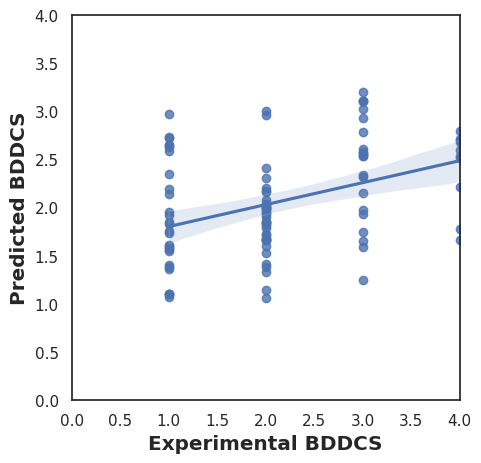

In [232]:
#Linear regression plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test,y=Y_pred)
ax.set_xlabel('Experimental BDDCS', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted BDDCS', fontsize='large', fontweight='bold')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.figure.set_size_inches(5, 5)
plt.show

In [233]:
#Decision Tree classifier Model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.41


In [234]:
#k nearest neighbour Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.61
Accuracy of K-NN classifier on test set: 0.39


In [235]:
#linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.65
Accuracy of LDA classifier on test set: 0.49


In [238]:
#Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.24
Accuracy of GNB classifier on test set: 0.21


In [239]:
#Support Vector Machine model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.48
Accuracy of SVM classifier on test set: 0.41
